In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Accuracy: 1.0
Confusion matrix: [[17  0]
 [ 0 13]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



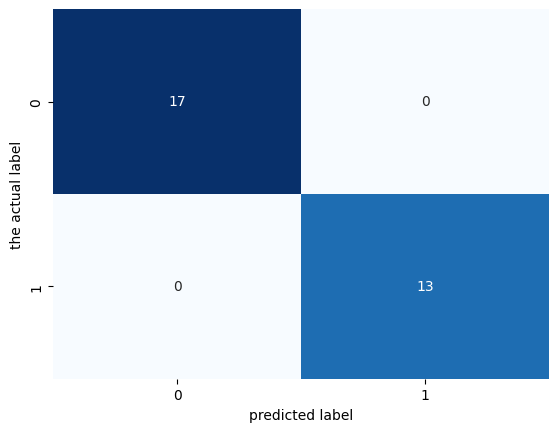

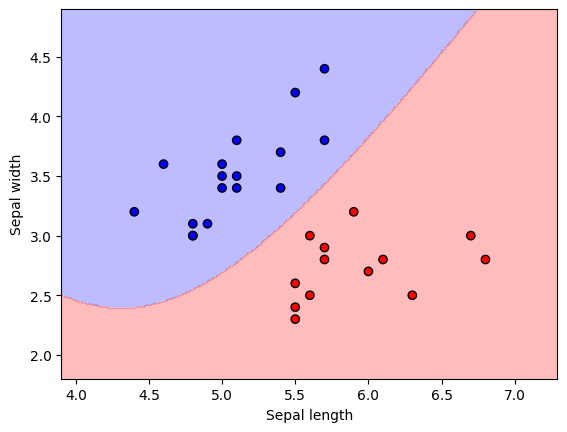

In [16]:
import numpy as np
#load the datasetr
iris=load_iris()
#let us use
x,y=iris.data[:,:2], iris.target

x=x[y !=2]
y=y[y !=2]

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

#train the model using gaussian naive
model=GaussianNB()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

#evaluate the model
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test,y_pred))

#plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('the actual label')
plt.show()

#plot the decision boundry
x_min, x_max=x_test[:,0].min()- 0.5, x_test[:, 0].max() +0.5
y_min, y_max=x_test[:,1].min()- 0.5, x_test[:, 1].max() +0.5

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min, y_max, 0.01))
z=model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.3, cmap='bwr')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', edgecolor= 'k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Accuracy: 0.8011695906432749


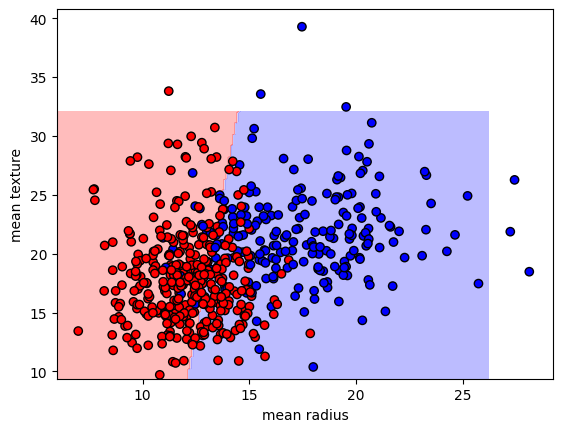

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the dataset

data=load_breast_cancer()
x,y =data.data, data.target
x=x[:, :2]

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

#train the model
per=Perceptron()
per.fit(x_train,y_train)
y_pred=per.predict(x_test)

#evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))

#plot the decision boundries
x_min, x_max=x_test[:,0].min()- 1, x_test[:, 0].max() +1
y_min, y_max=x_test[:,1].min()- 1, x_test[:, 1].max() +1
xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
z=per.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.3, cmap='bwr')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolors= 'k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the data
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns= ['pregnancies', 'glucose', 'bloodPress', 'skin', 'insulin', 'BMI', 'disbetes', 'age', 'outcome']
data=pd.read_csv(url, header=None, names= columns)

#select the features
x=data[['glucose', 'BMI']].values
y=data[['outcome']].values

def step(x):
  return np.where(x>0, 1, 0)

def sigmoid(x):
  return 1/ (1+np.exp(-x))

def relu(x):
  return np.maximum(0, x)

weight= np.array([0.05, -0.02])
bias=0.01
input_features=np.array([x[0,0], x[0,1]])

#calc the weight
weight_sum=np.dot(weight, input_features)+bias

#apply each activation function
